(1696, 200, 200, 1)
(401, 200, 200, 1)


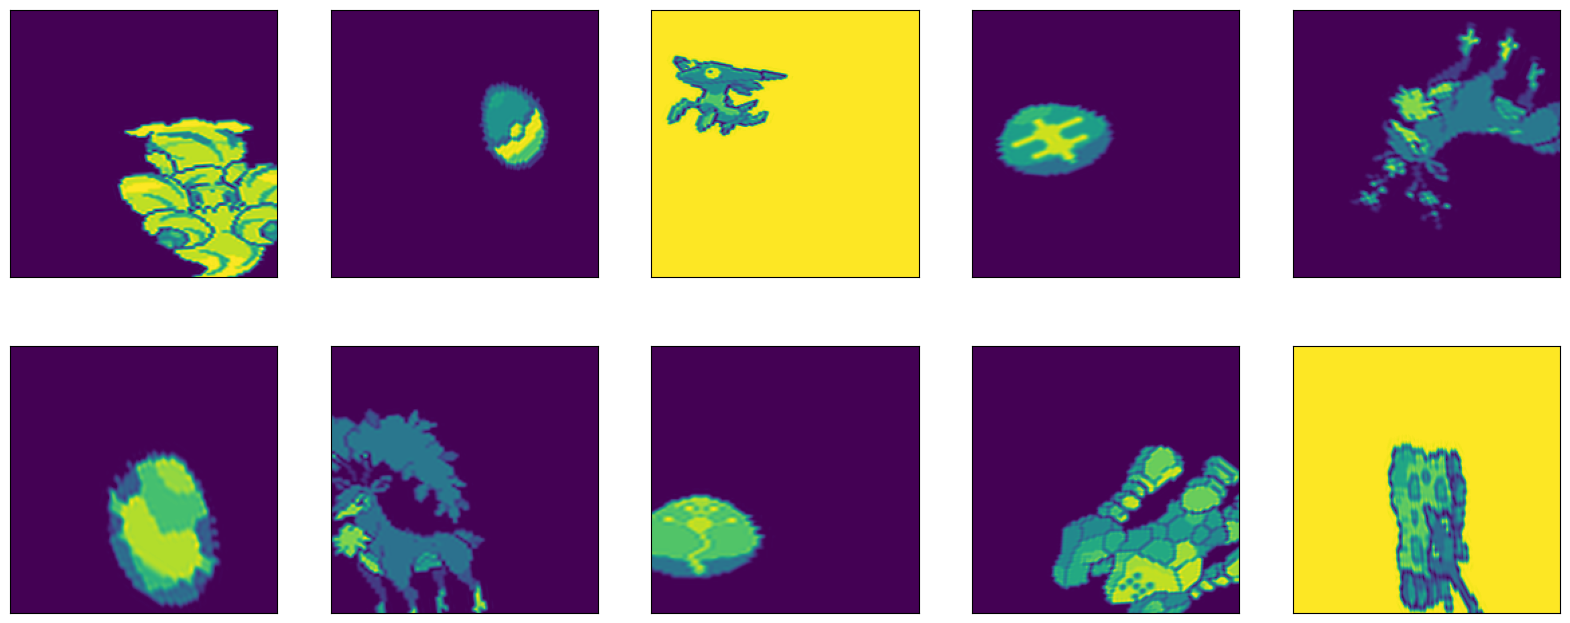

In [10]:
import os
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np 
from tensorflow.keras.callbacks import TensorBoard 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

entrenamiento = "Dataset/Entrenamiento"
validacion = "Dataset/Validacion"

# Verificar que las carpetas existan
if not os.path.exists(entrenamiento):
    raise Exception(f"La carpeta de entrenamiento no existe: {entrenamiento}")
if not os.path.exists(validacion):
    raise Exception(f"La carpeta de validación no existe: {validacion}")

listaTrain = os.listdir(entrenamiento)
listaTest = os.listdir(validacion)

# parametros
ancho, alto = 200, 200
etiquetas = []
fotos = []
datos_train = []
con = 0
etiquetas2 = []
fotos2 = []
datos_vali = []
con2 = 0

# Extraccion de imagenes de entrenamiento
for nameDir in listaTrain:
    nombre = os.path.join(entrenamiento, nameDir)
    
    for fileName in os.listdir(nombre):
        ruta_completa = os.path.join(nombre, fileName)
        try:
            # Usar PIL para leer la imagen
            img = Image.open(ruta_completa).convert('L')  # Convertir a escala de grises
            img = img.resize((ancho, alto), Image.Resampling.LANCZOS)
            img = np.array(img)
            
            etiquetas.append(con)
            img = img.reshape(ancho, alto, 1)
            datos_train.append(img)
            fotos.append(img)
        except Exception as e:
            print(f"Error procesando {ruta_completa}: {str(e)}")
            continue
    
    con += 1

# Extraccion de imagenes de validacion
for nameDir2 in listaTest:
    nombre2 = os.path.join(validacion, nameDir2)
    
    for fileName2 in os.listdir(nombre2):
        ruta_completa = os.path.join(nombre2, fileName2)
        try:
            # Usar PIL para leer la imagen
            img2 = Image.open(ruta_completa).convert('L')  # Convertir a escala de grises
            img2 = img2.resize((ancho, alto), Image.Resampling.LANCZOS)
            img2 = np.array(img2)
            
            etiquetas2.append(con2)
            img2 = img2.reshape(ancho, alto, 1)
            datos_vali.append(img2)
            fotos2.append(img2)
        except Exception as e:
            print(f"Error procesando {ruta_completa}: {str(e)}")
            continue
    
    con2 += 1

# Verificar que tengamos datos para procesar
if not fotos:
    raise Exception("No se encontraron imágenes válidas en la carpeta de entrenamiento")
if not fotos2:
    raise Exception("No se encontraron imágenes válidas en la carpeta de validación")

# normalizacion de imagenes
fotos = np.array(fotos).astype('float32') / 255
print(fotos.shape)
fotos2 = np.array(fotos2).astype('float32') / 255
print(fotos2.shape)

etiquetas = np.array(etiquetas)
etiquetas2 = np.array(etiquetas2)

mgTrainGen = ImageDataGenerator(
    rotation_range = 50,
    width_shift_range = 0.3,
    height_shift_range = 0.3,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    vertical_flip = True,
    horizontal_flip = True,
)

# Crear el generador de datos para entrenamiento
imgTrainGen = mgTrainGen.flow(fotos, etiquetas, batch_size=32)

# Visualizar algunas imágenes aumentadas
plt.figure(figsize=(20, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    
    # Obtener una imagen aleatoria
    idx = np.random.randint(len(fotos))
    img = fotos[idx]
    
    # Aplicar transformaciones aleatorias
    img_aug = mgTrainGen.random_transform(img)
    
    plt.imshow(img_aug.reshape(ancho, alto))
plt.show()

In [11]:
ModeloDenso = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (200, 200, 1)),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])

ModeloCNN = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (200, 200, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])

#con Dropout
ModeloCNN2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (200, 200, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])
#tensorboard --logdir="D:\Coding\Laboratorios IA\Deep Learning Escuela\trabajoCNN\logs"

d:\Coding\Laboratorios IA\entorno\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
d:\Coding\Laboratorios IA\entorno\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
ModeloDenso.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

ModeloCNN.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

ModeloCNN2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [14]:
BoardDenso = TensorBoard(log_dir = 'logs/Denso')
ModeloDenso.fit(imgTrainGen,batch_size = 32,validation_data = (fotos2, etiquetas2), epochs = 10, callbacks = [BoardDenso], steps_per_epoch = int(np.ceil(len(fotos) /float(32))), validation_steps = int(np.ceil(len(fotos2) /float(32))))

ModeloDenso.save('ModeloDenso.h5')
#ModeloDenso.save_weights('pesosDenso.h5')
print("Modelo Denso guardado")

BoardCNN = TensorBoard(log_dir = 'logs/CNN')
ModeloCNN.fit(imgTrainGen,batch_size = 32,validation_data = (fotos2, etiquetas2), epochs = 10, callbacks = [BoardCNN], steps_per_epoch = int(np.ceil(len(fotos) /float(32))), validation_steps = int(np.ceil(len(fotos2) /float(32))))

ModeloCNN.save('ModeloCNN.h5')
#ModeloCNN.save_weights('pesosCNN.h5')
print("Modelo CNN guardado")

BoardCNN2 = TensorBoard(log_dir = 'logs/CNN2')
ModeloCNN2.fit(imgTrainGen,batch_size = 32,validation_data = (fotos2, etiquetas2), epochs = 10, callbacks = [BoardCNN2], steps_per_epoch = int(np.ceil(len(fotos) /float(32))), validation_steps = int(np.ceil(len(fotos2) /float(32))))

ModeloCNN2.save('ModeloCNN2.h5')
#ModeloCNN2.save_weights('pesosCNN2.h5')
print("Modelo CNN2 guardado")



Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - accuracy: 0.7913 - loss: 0.5214 - val_accuracy: 0.6434 - val_loss: 0.6772
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.7975 - loss: 0.4446 - val_accuracy: 0.7456 - val_loss: 0.6043
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.7783 - loss: 0.4765 - val_accuracy: 0.6808 - val_loss: 1.5963
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.7772 - loss: 0.5204 - val_accuracy: 0.7332 - val_loss: 0.5665
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.7864 - loss: 0.4541 - val_accuracy: 0.7332 - val_loss: 0.6662
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.8016 - loss: 0.4595 - val_accuracy: 0.7207 - val_loss: 0.7238
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.7877 - loss: 0.4467 - val_accuracy: 0.7406 - val_loss: 0.6727
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.8149 - loss: 0.4290 - val_accuracy: 0.6110 

Modelo Denso guardado
Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 41s 733ms/step - accuracy: 0.6825 - loss: 0.5724 - val_accuracy: 0.6758 - val_loss: 0.4709
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 38s 721ms/step - accuracy: 0.7921 - loss: 0.3232 - val_accuracy: 0.8279 - val_loss: 0.5075
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 35s 653ms/step - accuracy: 0.8961 - loss: 0.2512 - val_accuracy: 0.8254 - val_loss: 0.3013
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 35s 651ms/step - accuracy: 0.9034 - loss: 0.2310 - val_accuracy: 0.9352 - val_loss: 0.1430
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 35s 665ms/step - accuracy: 0.9095 - loss: 0.2082 - val_accuracy: 0.8354 - val_loss: 0.2397
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 37s 689ms/step - accuracy: 0.9347 - loss: 0.1551 - val_accuracy: 0.9551 - val_loss: 0.1419
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 34s 643ms/step - accuracy: 0.9298 - loss: 0.1631 - val_accuracy: 0.9501 - val_loss: 0.1624
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 34s 644ms/step - accuracy: 0.9251 - l

Modelo CNN guardado
Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 36s 647ms/step - accuracy: 0.7218 - loss: 0.5002 - val_accuracy: 0.8180 - val_loss: 0.7033
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 34s 635ms/step - accuracy: 0.9035 - loss: 0.2571 - val_accuracy: 0.9002 - val_loss: 0.2542
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 34s 635ms/step - accuracy: 0.8946 - loss: 0.2837 - val_accuracy: 0.8204 - val_loss: 0.4242
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 34s 639ms/step - accuracy: 0.9135 - loss: 0.2038 - val_accuracy: 0.9277 - val_loss: 0.1571
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 34s 639ms/step - accuracy: 0.9305 - loss: 0.1636 - val_accuracy: 0.8180 - val_loss: 0.2039
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 34s 636ms/step - accuracy: 0.9253 - loss: 0.1878 - val_accuracy: 0.8304 - val_loss: 0.3409
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 35s 659ms/step - accuracy: 0.9117 - loss: 0.2111 - val_accuracy: 0.8304 - val_loss: 0.2868
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 35s 653ms/step - accuracy: 0.9272 - los

Modelo CNN2 guardado
